# import

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



# DATA

In [5]:
data = pd.read_csv('data.csv')
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            118 non-null    int64  
 1   flight_no            118 non-null    object 
 2   scheduled_departure  118 non-null    object 
 3   scheduled_arrival    118 non-null    object 
 4   departure_airport    118 non-null    object 
 5   arrival_airport      118 non-null    object 
 6   actual_departure     118 non-null    object 
 7   actual_arrival       118 non-null    object 
 8   total_time           118 non-null    object 
 9   status               118 non-null    object 
 10  airport_name         118 non-null    object 
 11  airport_code         118 non-null    object 
 12  city                 118 non-null    object 
 13  longitude            118 non-null    float64
 14  latitude             118 non-null    float64
 15  timezone             118 non-null    obj

In [18]:
# оставим, то что интересно
df = data[['flight_id','flight_no','scheduled_departure','actual_departure', 'actual_arrival','total_amount']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            118 non-null    int64  
 1   flight_no            118 non-null    object 
 2   scheduled_departure  118 non-null    object 
 3   actual_departure     118 non-null    object 
 4   actual_arrival       118 non-null    object 
 5   total_amount         118 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.7+ KB


In [67]:
# перевод datetime 
df['actual_departure'] = pd.to_datetime(df['actual_departure'])
df['actual_arrival'] = pd.to_datetime(df['actual_arrival'])
df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'])
# добавление столбца времени полета
df['total_time'] = df['actual_arrival'] - df['actual_departure']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   flight_id            118 non-null    int64              
 1   flight_no            118 non-null    object             
 2   scheduled_departure  118 non-null    datetime64[ns, UTC]
 3   actual_departure     118 non-null    datetime64[ns, UTC]
 4   actual_arrival       118 non-null    datetime64[ns, UTC]
 5   total_amount         118 non-null    float64            
 6   total_time           118 non-null    timedelta64[ns]    
 7   day                  118 non-null    int64              
 8   price                118 non-null    float64            
dtypes: datetime64[ns, UTC](3), float64(2), int64(2), object(1), timedelta64[ns](1)
memory usage: 8.4+ KB


In [68]:
# добавление дня недели вылета по расписанию
df['day'] = df['scheduled_departure'].dt.weekday
df['total_time'] = df['total_time'].dt.seconds
# расчет стоимости за секунду полета
df['price'] = df['total_amount'] / df['total_time']
df

,flight_id,flight_no,scheduled_departure,actual_departure,actual_arrival,total_amount,total_time,day,price
0,136119,PG0252,2017-01-03 10:05:00+00:00,2017-01-03 10:08:00+00:00,2017-01-03 11:49:00+00:00,1653000.0,6060,1,272.772277
1,136120,PG0252,2017-02-24 10:05:00+00:00,2017-02-24 10:07:00+00:00,2017-02-24 11:46:00+00:00,1605400.0,5940,4,270.269360
2,136122,PG0252,2017-01-08 10:05:00+00:00,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,1431000.0,6000,6,238.500000
3,136130,PG0252,2017-02-13 10:05:00+00:00,2017-02-13 10:07:00+00:00,2017-02-13 11:46:00+00:00,1556600.0,5940,0,262.053872
4,136131,PG0252,2017-01-28 10:05:00+00:00,2017-01-28 10:07:00+00:00,2017-01-28 11:46:00+00:00,1812800.0,5940,5,305.185185
...,...,...,...,...,...,...,...,...,...
113,136936,PG0480,2017-01-02 09:25:00+00:00,2017-01-02 09:28:00+00:00,2017-01-02 10:18:00+00:00,632400.0,3000,0,210.800000
114,136937,PG0480,2017-01-03 09:25:00+00:00,2017-01-03 09:29:00+00:00,2017-01-03 10:19:00+00:00,626100.0,3000,1,208.700000
115,136951,PG0480,2017-02-02 09:25:00+00:00,2017-02-02 09:28:00+00:00,2017-02-02 10:17:00+00:00,720600.0,2940,3,245.102041
116,136953,PG0480,2017-02-27 09:25:00+00:00,2017-02-27 09:27:00+00:00,2017-02-27 10:17:00+00:00,765300.0,3000,0,255.100000


<AxesSubplot:>

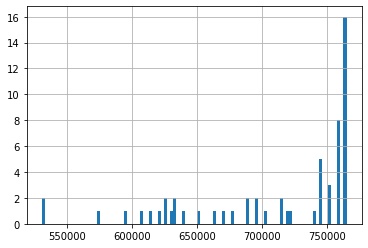

In [61]:
df.loc[(df['flight_no'] == 'PG0480')]['total_amount'].hist(bins=100)

<AxesSubplot:>

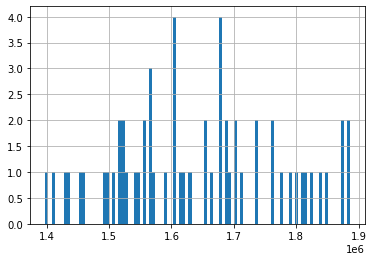

In [62]:
df.loc[(df['flight_no'] == 'PG0252')]['total_amount'].hist(bins=100)

<AxesSubplot:xlabel='day', ylabel='price'>

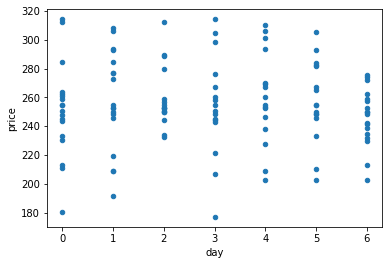

In [51]:
df.plot(x = 'day', y = 'price', kind = 'scatter')

<AxesSubplot:xlabel='day'>

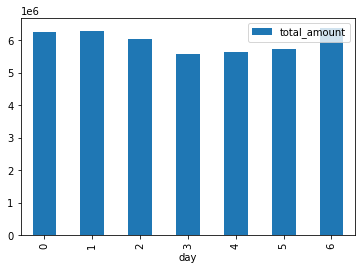

In [64]:
df.loc[(df['flight_no'] == 'PG0480')].pivot_table(values = ['total_amount'], index = 'day', aggfunc = 'sum').plot(kind = 'bar')

In [ ]:
df.loc[(df['flight_no'] == 'PG0252')].pivot_table(values = ['total_amount'], index = 'day', aggfunc = 'sum').plot(kind = 'bar')

<AxesSubplot:xlabel='flight_no'>

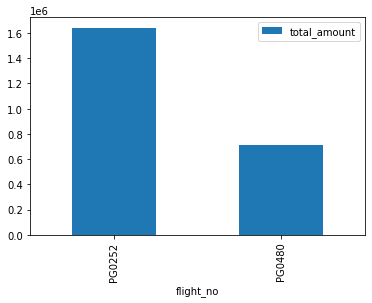

In [48]:
df.pivot_table(values = ['total_amount'], index = 'flight_no', aggfunc = 'mean').plot(kind = 'bar')

<AxesSubplot:xlabel='flight_no'>

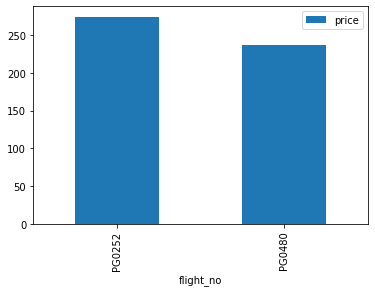

In [49]:
df.pivot_table(values = ['price'], index = 'flight_no', aggfunc = 'mean').plot(kind = 'bar')